## Calculate Cloud cover using Python
Since we want to work with cloud coverage in stellite images in our final project,I thought getting familiar with using it in a local environment and also with usinge arth engine is a good idea.

In this project I want to try to create a cloud mask for Landsat-8 imagery, with rasterio and rio-l8qa (a Library for extracting integer values from Landsat Bands).

In order to do so I took the following steps:

1. Acquiring the satellite image we want to careate the cloud mask for.
2. Installing the necessary libraries, which are in our case rasterio and rio-l8qa.

In [1]:
%pip install rasterio

%pip install rio-l8qa

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


3. Importing some of the necessary functions:
    - glob for finding pathnames matching a specific pattern, in our case the file that contains *QA* in its name, indicating it being the band for quality assesment
    - os for manipulating system paths, in our case to read the files in the L8 folder and to write the new 'cloudmask.tif' image
    - rasterio to open the raster images
    - from the l8qa module write_cloud_mask to create the cloud mask from the band values

In [2]:
import glob
import os
import rasterio
from l8qa.qa import write_cloud_mask

# Reference to sat. image directory
landsat_dir = "L8"

# locate quality-assurance Metadata
src_qa = glob.glob(os.path.join(landsat_dir, '*QA*.tif'))[0]

#
with rasterio.open(src_qa) as qa_raster:
 profile = qa_raster.profile
 profile.update(nodata=0)
 write_cloud_mask(qa_raster.read(1), profile, 'cloudmask.tif')


I want to now display, the image I created the cloud mask for and the cloud mask itself.
To do so I am using rasterio as well:

from observing the differences it seems like there is an issue with the genereation of the clopud mask, It seems like the quality assesment data used may be faulty, as while there are a few specks of the clouds apparent in the cloud mask, a lot of the cloud imagery is missing.

I also thought the issue might be with rasterio displaying the picture, but I looked at the .tif file in arcgis pro and it displayed in the same way.

Another possibility to complete the task may be to use the rio-cloudmask rasterio plugin, which does not rely on the use of quality assesment data but does work with the command line.

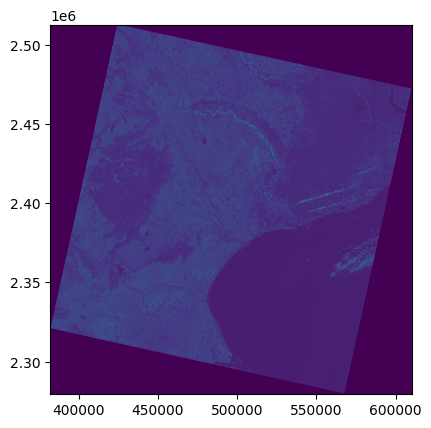

<Axes: >

In [5]:
from rasterio.plot import show

fp = r"L8/LC08_L1TP_139045_20170304_20170316_01_T1_B7.TIF"

raster = rasterio.open(fp)

show(raster)

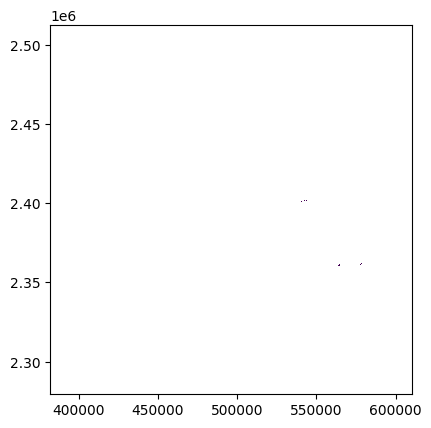

<Axes: >

In [9]:

fp = r"cloudmask.TIF"

raster = rasterio.open(fp)

show(raster)